http://127.0.0.1:5000/ortools/cc/vrp
ortools: Total distance 354
ortools: Total load 50


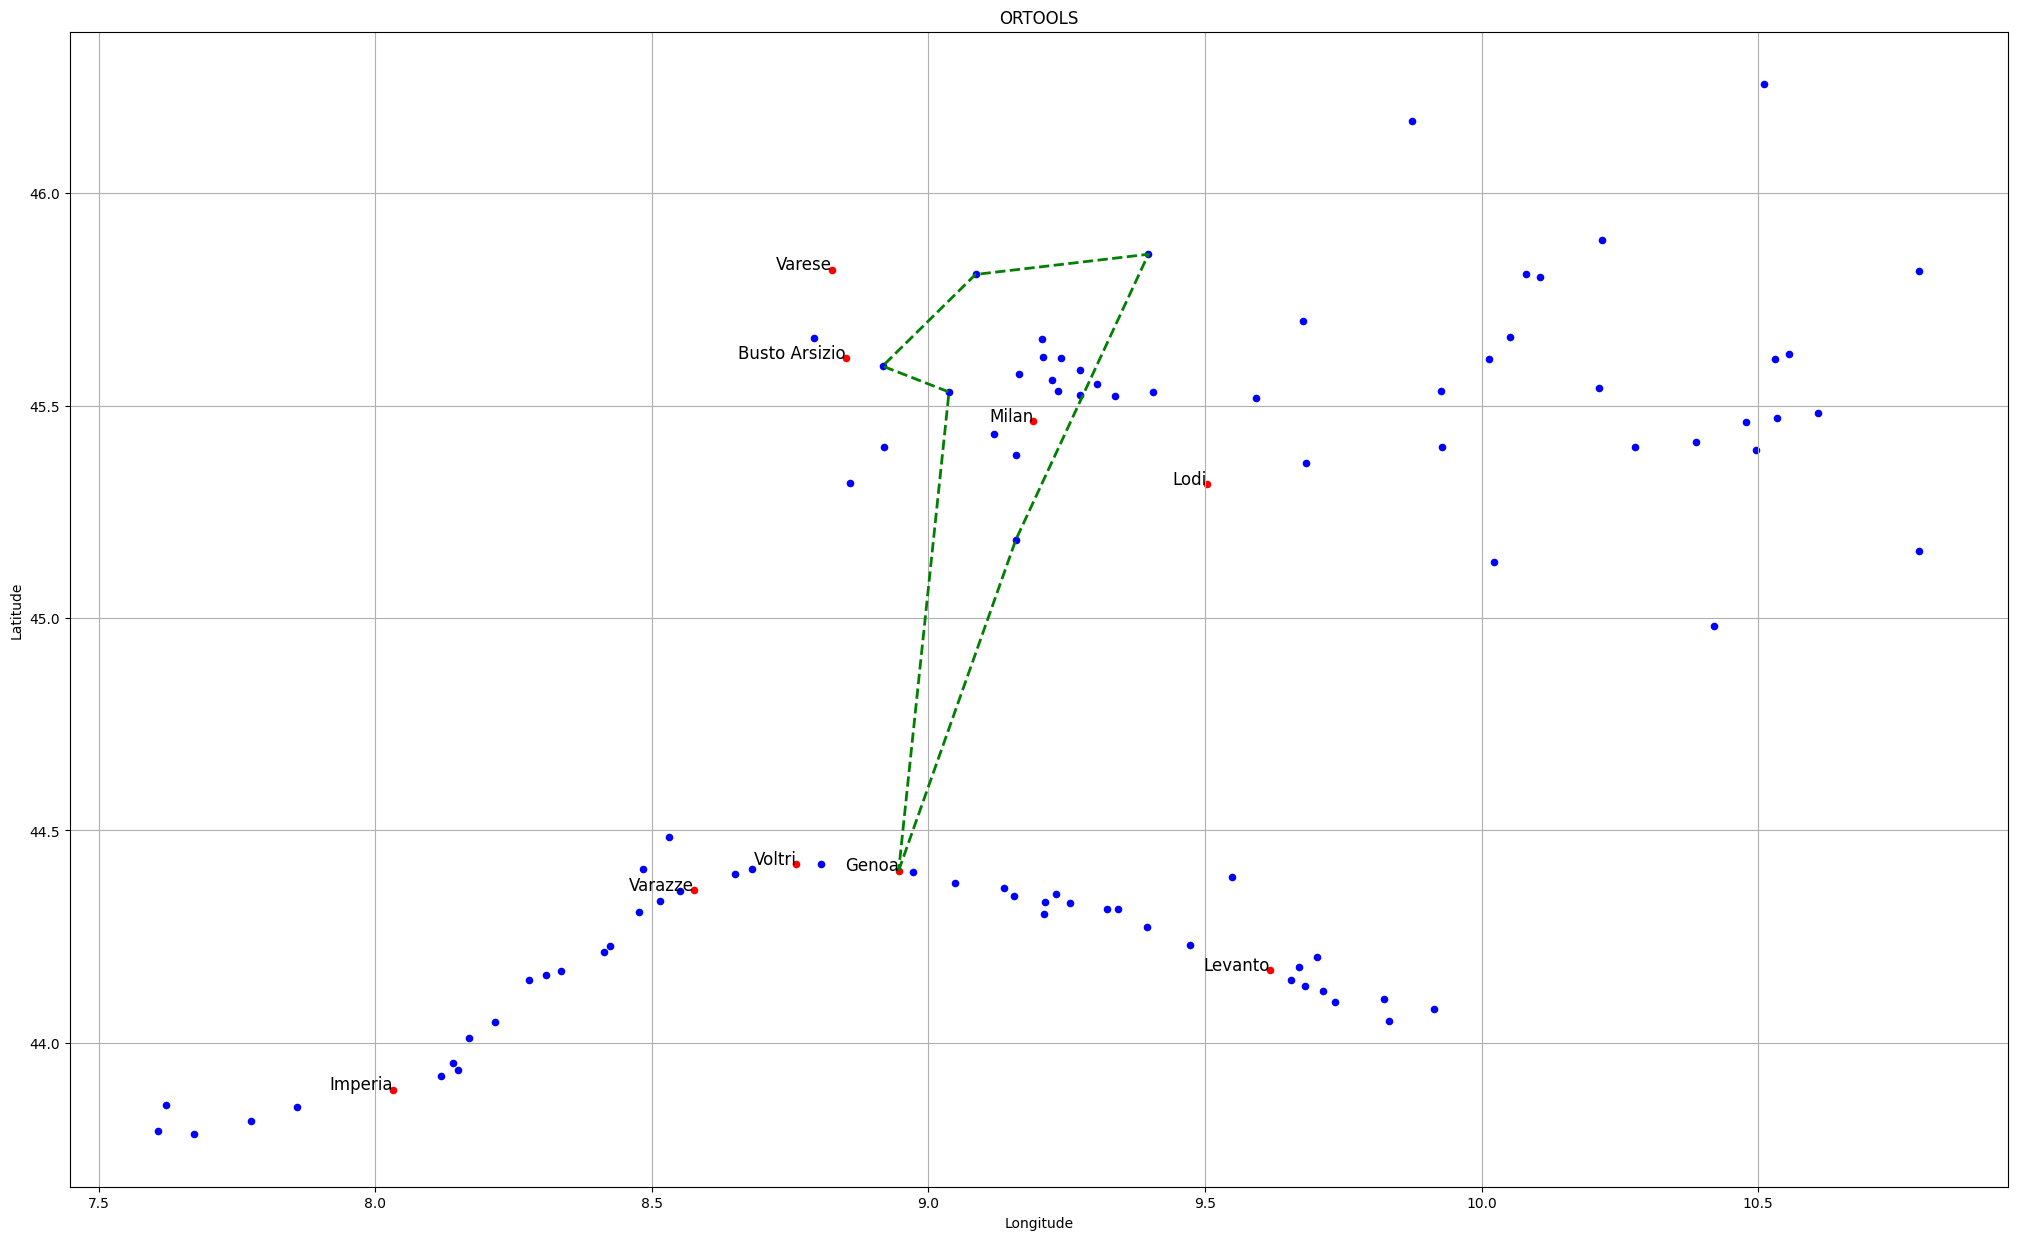

http://127.0.0.1:5000/llm/gpt-4o/vrp
gpt-4o: Total distance 464
gpt-4o: Total load 50


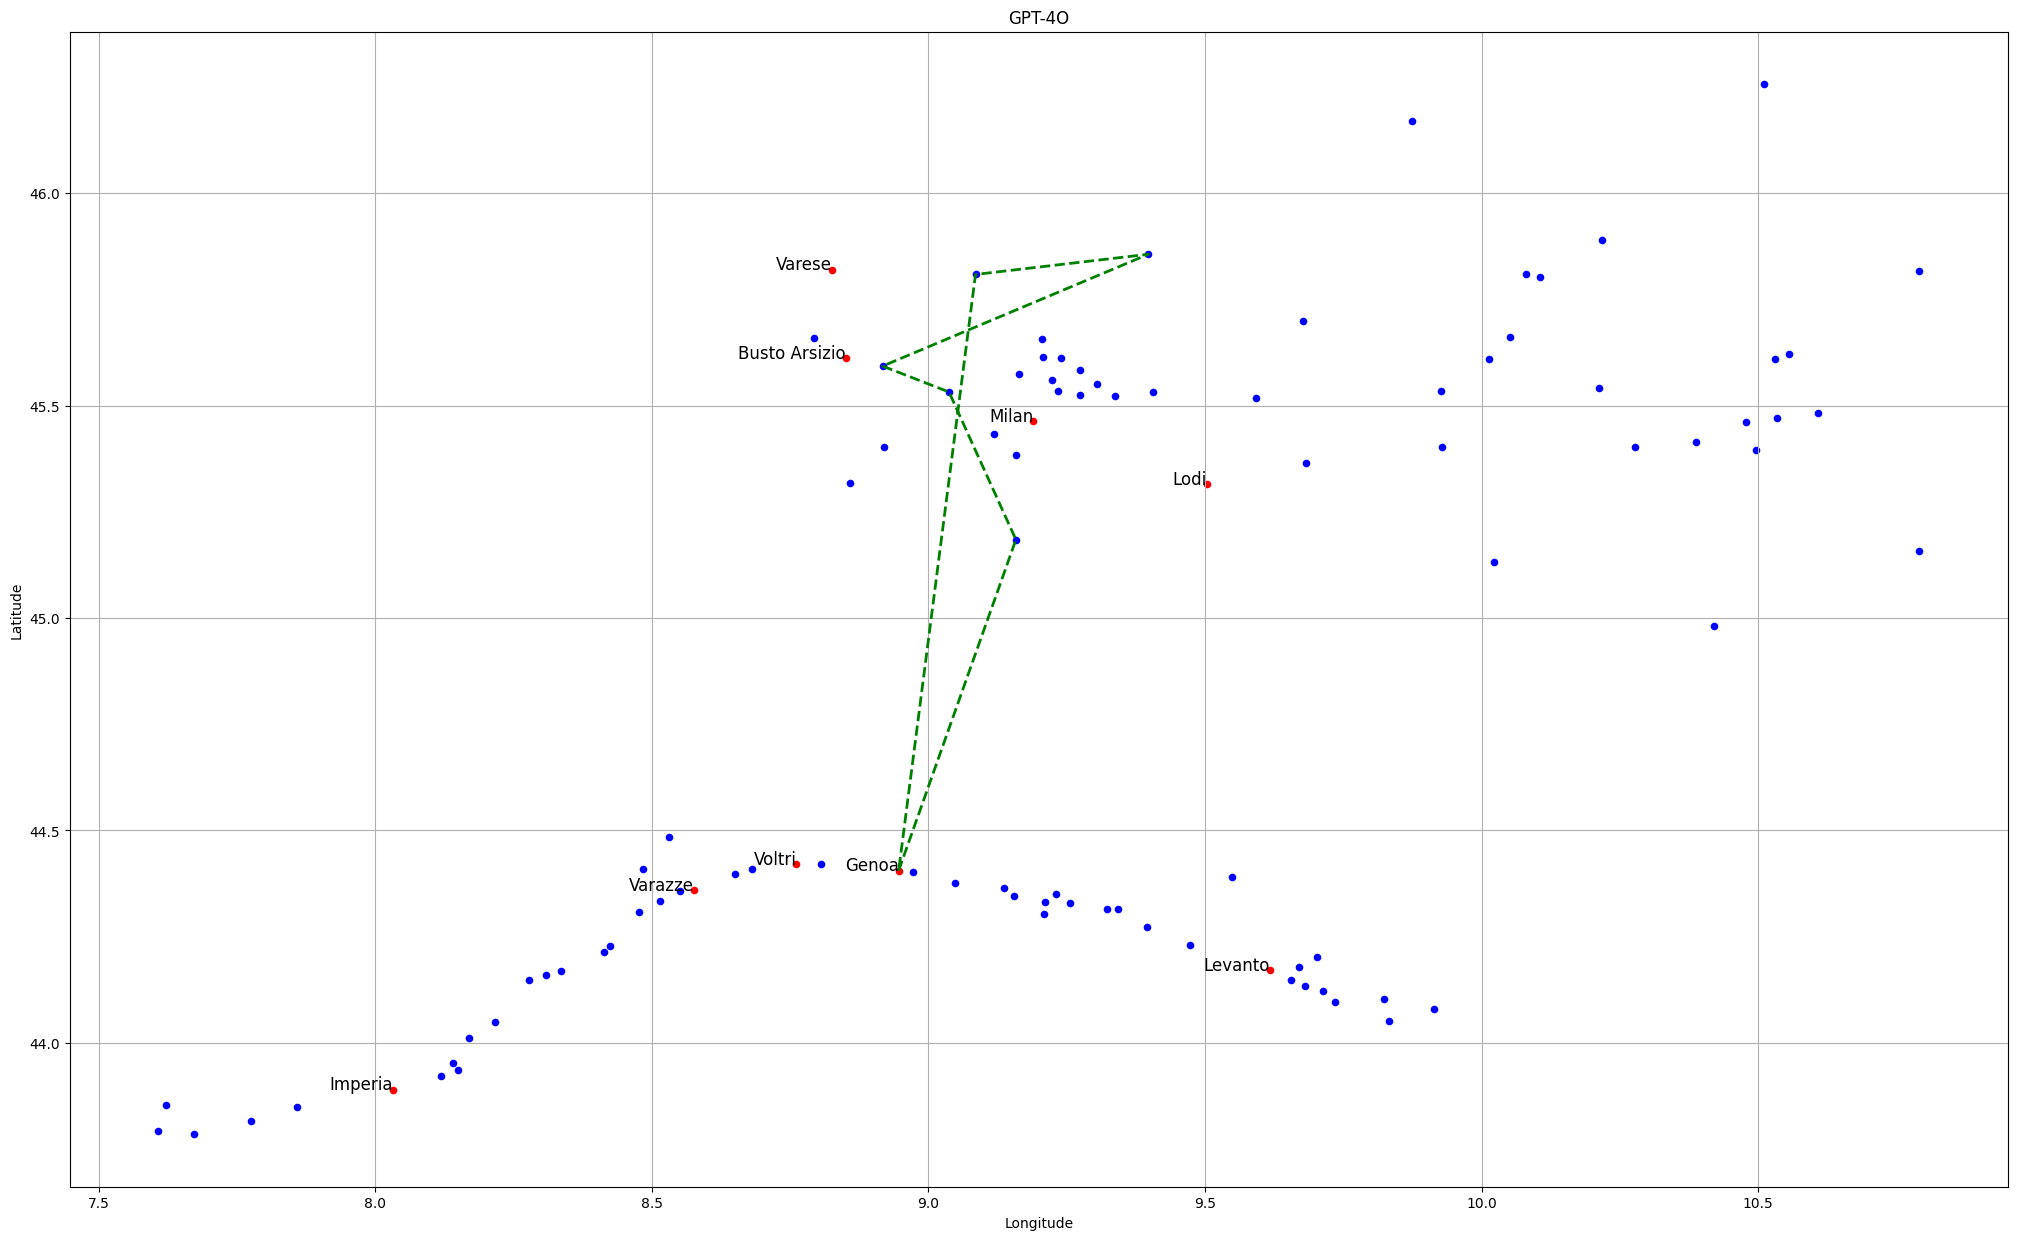

http://127.0.0.1:5000/llm/claude-3-sonnet/vrp
claude-3-sonnet: Total distance 361
claude-3-sonnet: Total load 60


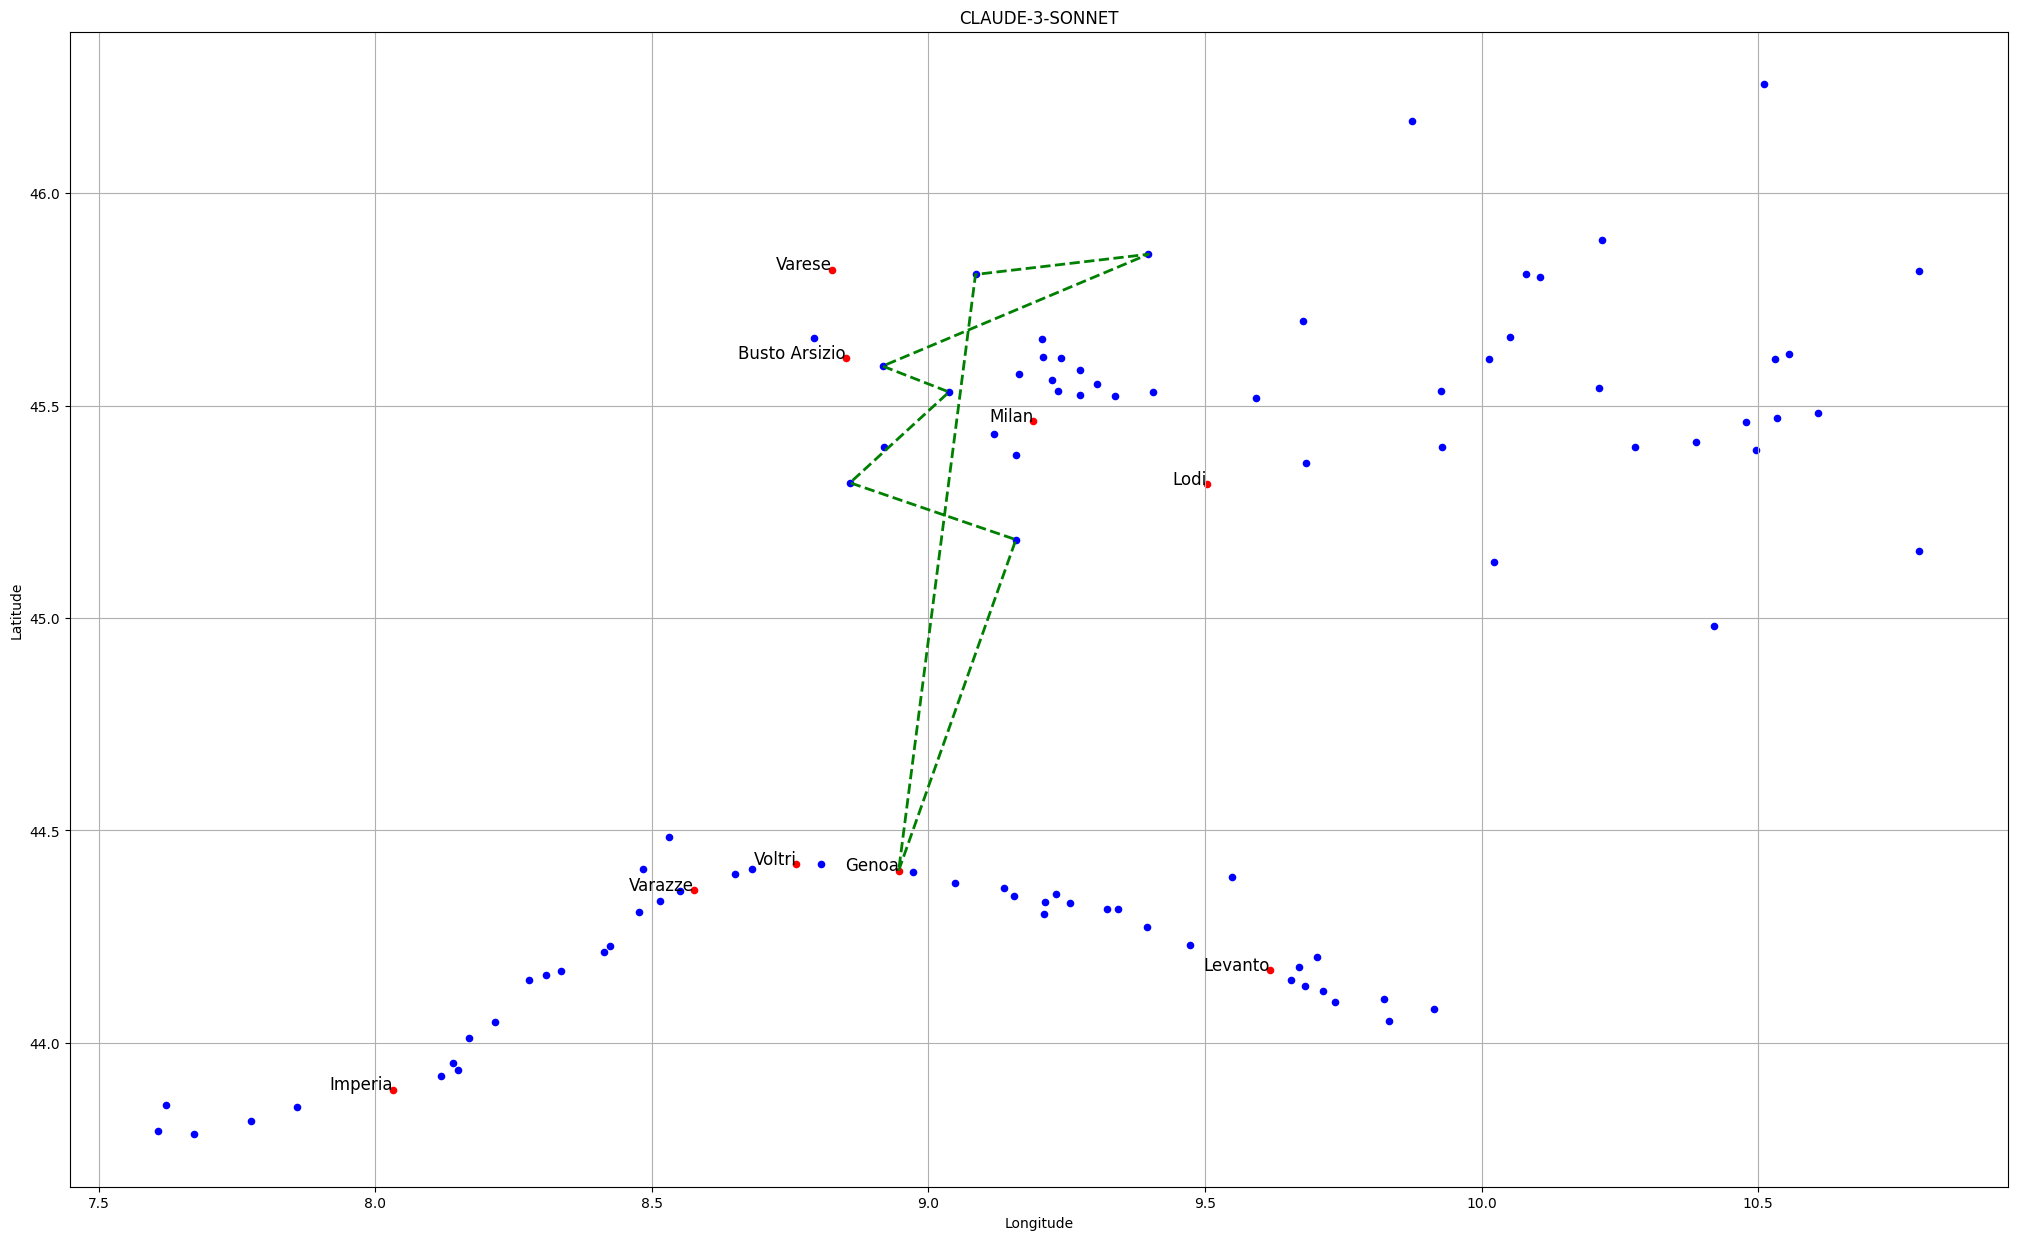

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

def fetch_data(url):
    response = requests.get(url)
    data = response.json() 
    return data

def get_solution(url,body):
    response=requests.post(url, json=body)
    data=response.json()
    return data


depos=fetch_data('http://127.0.0.1:5000/basic/depo/get-all')
nodes=fetch_data('http://127.0.0.1:5000/basic/node/get-all')

payload = {
   "demands":[
      {
         "node":"Como",
         "demand":10
      },
      {
         "node":"Lecco",
         "demand":10
      },
      {
         "node":"Rho",
         "demand":10
      },
      {
         "node":"Pavia",
         "demand":10
      },
      {
         "node":"Legnano",
         "demand":10
      },
   ],
   "depo_vehicle":[
      {
         "depo":"Genoa",
         "plate":"AB123"
      },
   ]
}


def build_solution(payload, depos, nodes, service, model=None, reference=None):
    url=f'http://127.0.0.1:5000/ortools/cc/vrp{'' if reference==None else '?reference={reference}'}' if service=='ortools' else f'http://127.0.0.1:5000/llm/{model}/vrp{'' if reference==None else '?reference={reference}'}'
    print(url)
    solution=get_solution(url, payload)

    print(f"{service}: Total distance {solution['total_distance']}")
    print(f"{service}: Total load {solution['total_load']}")

    df_depos = pd.DataFrame(depos)
    df_nodes = pd.DataFrame(nodes)

    fig, ax = plt.subplots(figsize=(25, 15))

    # Plot depots in red
    ax.scatter(df_depos['longitude'], df_depos['latitude'], color='red', label='Location', s=20)
    # Plot nodes in blue
    ax.scatter(df_nodes['longitude'], df_nodes['latitude'], color='blue', label='Location', s=20)

    # Annotate depots with names
    for i, row in df_depos.iterrows():
        ax.text(row['longitude'], row['latitude'], row['name'], fontsize=12, ha='right')

    # Annotate nodes with names
    #for i, row in df_nodes.iterrows():
    #    ax.text(row['longitude'], row['latitude'], row['name'], fontsize=12, ha='right')

    # Function to draw route lines
    def draw_route(route, color):
        df=pd.concat([df_depos, df_nodes])
        connections = [(df.loc[df['id'] == i, 'longitude'].values[0], df.loc[df['id'] == i, 'latitude'].values[0]) for i in route]
        if len(connections) > 1:
            x_values, y_values = zip(*connections)
            ax.plot(x_values, y_values, color=color, linewidth=2, linestyle='--')

    route_colors=['green','yellow','purple','orange','blue']
    for idx, route_info in enumerate(solution['routes']):
        color=route_colors[idx % len(route_colors)]
        draw_route(route_info['route'], color)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(service.upper())

    plt.grid(True)
    plt.show()


build_solution(payload, depos, nodes,'ortools' )
build_solution(payload, depos, nodes, 'gpt-4o', model='gpt-4o')
build_solution(payload, depos, nodes, 'claude-3-sonnet', model='claude-3-sonnet')



















